In [6]:
path='https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Software_5.json.gz'
# 'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz'

# 'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Digital_Music_5.json.gz'
#'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Video_Games_5.json.gz'
# 'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Books_5.json.gz'
# 'https://jmcauley.ucsd.edu/data/amazon_v2/categoryFilesSmall/Appliances_5.json.gz'


In [7]:
import ssl

ssl._create_default_https_context = ssl._create_stdlib_context

In [8]:
!pip install wget
import wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a2526251552459ec62a7252f93c424f79a36a171910288612984b60d680aee89
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [9]:
filename = wget.download(path)

In [10]:
!gunzip '/content/Software_5.json.gz'

In [1]:
!pip install stopwords

In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
%matplotlib inline
import re
import seaborn as sbn
import nltk
import tqdm as tqdm
import sqlite3
import pandas as pd
import numpy as np

import string
from nltk.corpus import stopwords
stop = stopwords.words("english")
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from math import floor,ceil
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.svm import LinearSVC

from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# from gensim import summarization
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [11]:
review_data = pd.read_json('/content/Software_5.json', lines=True)


In [12]:
review_data=review_data.head(3000)

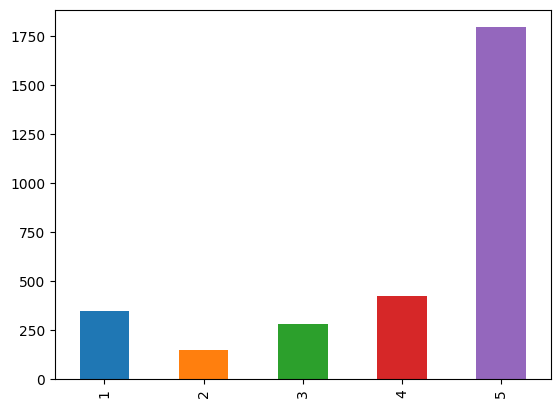

In [13]:
counts = review_data['overall'].value_counts().sort_index()
colors = plt.cm.tab10(np.arange(len(counts)))
ax = counts.plot.bar(color=colors)

In [14]:
data = {
    'text': review_data['reviewText'].dropna(),
    'label': review_data['overall']  # 1 for positive sentiment, 0 for negative sentiment
}
df = pd.DataFrame(data)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [15]:
df.dropna()

,text,label
0,I've been using Dreamweaver (and it's predeces...,4
1,"The demo is done with the PC version, with ref...",4
2,If you've been wanting to learn how to create ...,5
3,I've been creating websites with Dreamweaver f...,5
4,I decided (after trying a number of other prod...,5
...,...,...
2995,"This package includeds Word, Excel, Powerpoint...",5
2996,These comments focus primarily on Word and Exc...,2
2997,I like the nice glass look and some of the new...,2
2998,If you do any programming or statistical analy...,1


In [ ]:
def data_clean( rev, remove_stopwords=True):
    new_text =  re.sub("[^a-zA-Z]"," ", rev)
    # words = new_text.lower().split()
    words=nltk.tokenize.word_tokenize(new_text)
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer
    for word in words:
        ary.append(eng_stemmer.stem(word))
    return(words)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# clean_reviewData = []
# for rev in review_data['reviewText']:
#     clean_reviewData.append( " ".join((data_clean(str(rev),True))))

In [ ]:
# type(clean_reviewData)

In [ ]:
from gensim.parsing.preprocessing import remove_stopwords
filtered_words = remove_stopwords(str(review_data['reviewText']))

In [ ]:
type(clean_reviewData)

list

In [ ]:
clean_reviewData

['This awesome listen A must Slayer fans sadly needed triple disc set They many hits',
 'bien',
 'It great hear old stuff I like new stuff I recommend Slayer fan',
 'well best bit poison normally bad pretty good I put hell await reign blood south seasons divine couple musica tracks everything god hates point best mean every cd mainly bad dose put great tracks live shows play much like skeletons society sex murder art Gemini rare track final six bonus track Christ illusion mystery cover songs unditstputed attitude cd would greatest hits collection I know also put couple live tracks could much worse great car',
 'What I say This Casting Crowns This good blessing filled CD',
 'Enjoy Casting Crowns songs',
 'Another inspirational collection Very popular Christian group Another Favorites',
 'I love song Slow Fade Casting Crowns especially put children version end song speaks everyone us careful itching ears may take faith attention away Lord watchful time put armour times gospel The song sl

In [ ]:
# filtered_words2=list(filtered_words.split(","))

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Create a set of stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS
# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Parse the sentence using spaCy
  doc = nlp(sentence)
  # Use a list comprehension to remove stop words
  filtered_tokens = [token for token in doc if not token.is_stop]
  # Join the filtered tokens back into a sentence
  return ' '.join([token.text for token in filtered_tokens])

In [ ]:
# filtered_words3=[]
# for i in filtered_words2:
#   filtered_words3.append(remove_stop_words(i))


In [ ]:
[0]

[0]

In [ ]:
data_clean2={
              'text': clean_reviewData,
              'label': review_data['overall']
}

In [ ]:
type(data_clean2)

dict

In [ ]:
data_clean2.head(2)

AttributeError: 'dict' object has no attribute 'head'

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
data_clean2.columns

AttributeError: 'dict' object has no attribute 'columns'

In [ ]:
pd.DataFrame(data_clean2, columns=['Date', 'DateValue'])

,Date,DateValue


In [ ]:
df = pd.DataFrame(data_clean2)

ValueError: array length 64455 does not match index length 169781

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [17]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 4.1 MB/s eta 0:00:00


In [18]:
# pip install --upgrade shap tensorflow


In [19]:
#!device='cpu'

Train on 1890 samples, validate on 210 samples
Epoch 1/5
1890/1890 [==============================] - 2s 925us/sample - loss: 1.3486 - accuracy: 0.5862 - val_loss: 1.1631 - val_accuracy: 0.5571
Epoch 2/5
  32/1890 [..............................] - ETA: 1s - loss: 0.8667 - accuracy: 0.7188

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


1890/1890 [==============================] - 1s 552us/sample - loss: 0.9616 - accuracy: 0.6037 - val_loss: 0.9030 - val_accuracy: 0.5667
Epoch 3/5
1890/1890 [==============================] - 1s 528us/sample - loss: 0.7470 - accuracy: 0.6720 - val_loss: 0.8032 - val_accuracy: 0.7000
Epoch 4/5
1890/1890 [==============================] - 1s 588us/sample - loss: 0.5728 - accuracy: 0.7931 - val_loss: 0.6989 - val_accuracy: 0.7476
Epoch 5/5
1890/1890 [==============================] - 1s 588us/sample - loss: 0.4218 - accuracy: 0.8508 - val_loss: 0.6045 - val_accuracy: 0.7857


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


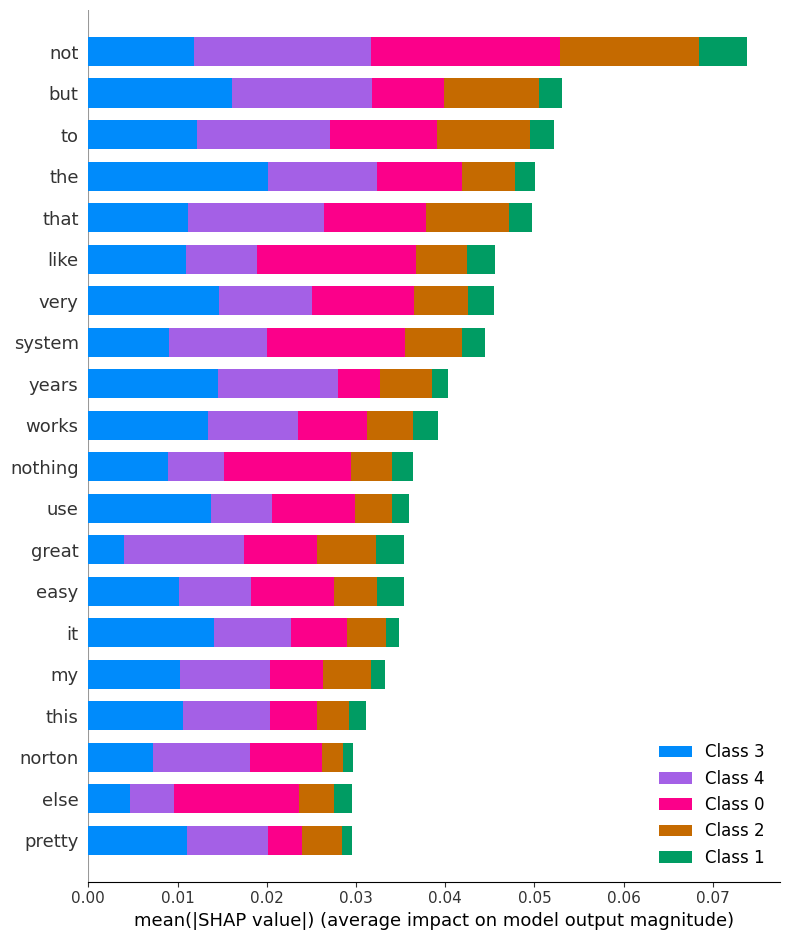

In [20]:
import shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

# Assume you have a dataset with text data and corresponding labels
# For demonstration, let's create a sample dataset with three classes
# data = {
#     'text': ["I love this product!", "This product is terrible.", "It's okay, not great.", "This is amazing!",
#              "Not good enough.", "It's fantastic!","awesome","It's okay, not great."],
#     'label': ['positive', 'negative', 'negative', 'positive', 'negative', 'positive','positive','neutral']
# }
df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train.values.astype('U'))
X_test_vectorized = vectorizer.transform(X_test)
# v.fit_transform(df['Review'].values.astype('U'))
# Convert sparse matrix to dense numpy array
X_train_array = X_train_vectorized.toarray()
X_test_array = X_test_vectorized.toarray()

# Convert labels to numerical indices
class_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
y_train_encoded = np.array([class_mapping[label] for label in y_train])
y_test_encoded = np.array([class_mapping[label] for label in y_test])

# Build a neural network model
num_classes = len(np.unique(y_train))
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_array.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Using softmax activation for multiclass classification
])

optimizer1 = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_array, y_train_encoded, epochs=5, batch_size=32, validation_split=0.1)

# Explain predictions using DeepExplainer
explainer = shap.DeepExplainer(model, X_train_array)
shap_values = explainer.shap_values(X_test_array)




# Plot SHAP values
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out())


In [21]:
# Define class names
class_names = ['negative', 'less negative', 'neutral','less positive','positive']

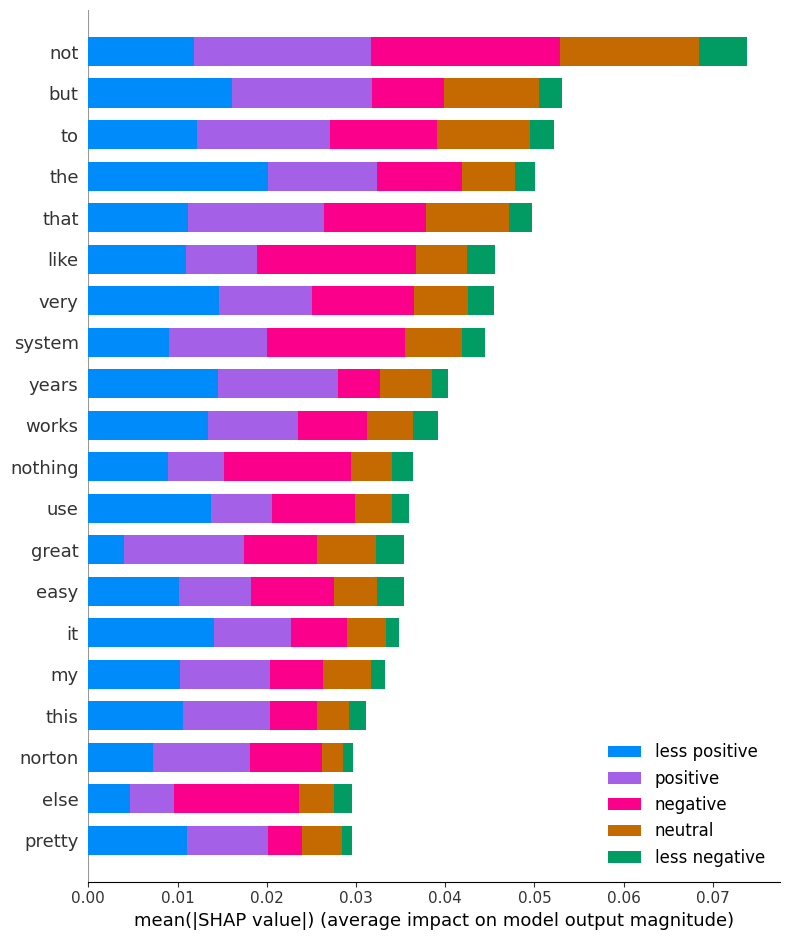

In [22]:
# Plot SHAP values with class names
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out(), class_names=class_names)

In [ ]:
X_test_array

In [ ]:
# Choose a specific instance index from the test set
instance_index = 1  # Change this index to explain a different instance
# Choose the class index you want to explain (for multi-class classification)
class_index = 1  # Change this index accordingly

# Explain prediction for the specific instance using DeepExplainer
explainer = shap.DeepExplainer(model, X_train_array)
shap_values_single = explainer.shap_values(X_test_array)

# Reshape SHAP values to match the expected shape
shap_values_single_reshaped = np.expand_dims(shap_values_single[class_index][instance_index], axis=0)

# Reshape the expected value to match the shape of SHAP values
expected_value_reshaped = np.expand_dims(explainer.expected_value[class_index], axis=0)

# Plot SHAP values for the specific instance and specific class
shap.summary_plot(shap_values, X_test_array, feature_names=vectorizer.get_feature_names_out(), class_names=class_names)


KeyboardInterrupt: 

In [ ]:
import shap
# Explain predictions using SHAP
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(X_test_vectorized)

# Plot SHAP values
shap.summary_plot(shap_values, X_test_vectorized, feature_names=vectorizer.get_feature_names_out())

InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [ ]:
def data_clean( rev, remove_stopwords=True):
    new_text = re.sub("[^a-zA-Z]"," ", rev)
    words = new_text.lower().split()
    if remove_stopwords:
        sts = set(stopwords.words("english"))
        words = [w for w in words if not w in sts]
    ary=[]
    eng_stemmer = english_stemmer
    for word in words:
        ary.append(eng_stemmer.stem(word))
    return(ary)

In [ ]:
clean_reviewData = []
for rev in review_data['reviewText']:
    clean_reviewData.append( " ".join((data_clean(str(rev)))))

In [ ]:
clean_summaryData = []
for rev in review_data['summary']:
    clean_summaryData.append( " ".join((data_clean(str(rev)))))

In [ ]:
Most_used_Words_Review =pd.Series(' '.join(clean_reviewData).lower().split()).value_counts()[:20]
print (Most_used_Words_Review)

song       130840
love        55760
great       52841
music       42322
like        36679
album       33398
one         32194
good        30983
listen      20615
time        17837
sound       17656
realli      15394
get         14380
track       12425
make        12354
best        11486
would       10846
cd          10317
classic      9944
back         9922
dtype: int64


In [ ]:
Most_used_Words_Summary = pd.Series(' '.join(clean_summaryData).lower().split()).value_counts()[:20]
print (Most_used_Words_Summary)

star       64839
five       53352
song       23222
great      16449
love       12709
four        7988
good        7601
music       6126
one         3590
classic     3344
like        3134
best        2906
album       2419
three       2275
awesom      2271
beauti      1897
nice        1782
rock        1562
sound       1503
favorit     1463
dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text_vectorizer = TfidfVectorizer(min_df=4, max_features = 1000)
test_vecor = text_vectorizer.fit_transform(clean_reviewData)
tfidf_vector = dict(zip(text_vectorizer.get_feature_names_out(), text_vectorizer.idf_))

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sample_review = review_data.reviewText[:10]
for test in sample_review:
    test
    ss = analyser.polarity_scores(test)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]))
    print(test)

compound: 0.6892, 
neg: 0.0, 
neu: 0.81, 
pos: 0.19, 
This is awesome to listen to, A must-have for all Slayer fans..sadly needed to be a triple disc set..They have so many hits!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
bien
compound: 0.886, 
neg: 0.0, 
neu: 0.599, 
pos: 0.401, 
It was great to hear the old stuff again and I like the new stuff too. I recommend it to any Slayer fan.
compound: 0.9737, 
neg: 0.153, 
neu: 0.581, 
pos: 0.266, 
well best of's are a bit poison normally but this is not bad it's pretty good because I'd have put 90% hell await,reign in blood,south of,seasons ,divine and a couple musica's tracks and everything on god hates -at that point best of mean every cd mainly so this is not so bad  it dose put some great tracks that live shows don't play much out there like,213, skeletons of society,sex murder art and Gemini and some rare track too,final six is just a bonus track on Christ illusion but it's here with the mystery cover songs from unditstputed attit

In [ ]:
from sklearn.cluster import MiniBatchKMeans

clusters = 20
kmeans_model = MiniBatchKMeans(n_clusters=clusters, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmodel = kmeans_model.fit(test_vecor)
kmodel_clusters = kmodel.predict(test_vecor)
kmodel_distances = kmodel.transform(test_vecor)
centroids = kmodel.cluster_centers_.argsort()[:, ::-1]
values = text_vectorizer.get_feature_names_out()
for i in range(clusters):
    print("Cluster %d:" % i)
    for j in centroids[i, :5]:
        print(' %s' % values[j])
    print()

Cluster 0:
 great
 tell
 think
 album
 record

Cluster 1:
 love
 music
 song
 album
 voic

Cluster 2:
 song
 love
 great
 enjoy
 download

Cluster 3:
 good
 song
 music
 qualiti
 stuff

Cluster 4:
 great
 song
 love
 voic
 one

Cluster 5:
 song
 like
 love
 great
 one

Cluster 6:
 ok
 memori
 expect
 bring
 product

Cluster 7:
 love
 song
 hate
 ever
 amaz

Cluster 8:
 favorit
 one
 song
 time
 love

Cluster 9:
 classic
 song
 great
 rock
 music

Cluster 10:
 great
 song
 sound
 album
 tune

Cluster 11:
 love
 song
 get
 like
 good

Cluster 12:
 awesom
 song
 love
 music
 great

Cluster 13:
 beauti
 song
 perfect
 voic
 love

Cluster 14:
 music
 great
 like
 love
 wonder

Cluster 15:
 thank
 great
 love
 song
 music

Cluster 16:
 excel
 music
 album
 best
 one

Cluster 17:
 nice
 song
 tune
 music
 beat

Cluster 18:
 song
 love
 alway
 great
 beat

Cluster 19:
 cool
 song
 like
 realli
 much



In [ ]:
test_reviewText = review_data.reviewText
test_Ratings = review_data.overall
text_vectorizer = TfidfVectorizer(max_df=.8)
text_vectorizer.fit(test_reviewText.apply(lambda x: np.str_(x)))
def rate(r):
    ary2 = []
    for rating in r:
        tv = [0,0,0,0,0]
        tv[rating-1] = 1
        ary2.append(tv)
    return np.array(ary2)

In [ ]:
test_reviewText =test_reviewText[:2000]
test_reviewText

0       This is awesome to listen to, A must-have for ...
1                                                    bien
2       It was great to hear the old stuff again and I...
3       well best of's are a bit poison normally but t...
4       What can I say? This is Casting Crowns!!!This ...
                              ...                        
1995    This is a classic song and one of my all time ...
1996    I really don't like this style of music, but t...
1997    great song. Love the song. Great one to have i...
1998    With its shimmering production, crystal clear ...
1999    The Raspberries song "Go All The Way". A great...
Name: reviewText, Length: 2000, dtype: object

In [ ]:
test_Ratings = test_Ratings[:2000]
test_Ratings

0       5
1       5
2       5
3       4
4       5
       ..
1995    5
1996    5
1997    5
1998    5
1999    5
Name: overall, Length: 2000, dtype: int64

In [ ]:
X = text_vectorizer.transform(test_reviewText).toarray()
y = rate(test_Ratings.values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

model = Sequential()
model.add(Dense(128,input_dim=X_train.shape[1]))
model.add(Dense(5,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=10,batch_size=32,verbose=1)
model.evaluate(X_test,y_test)[1]

Epoch 1/10
50/50 [==============================] - 6s 103ms/step - loss: 0.9484 - accuracy: 0.8006 - val_loss: 0.6317 - val_accuracy: 0.8325
Epoch 2/10
50/50 [==============================] - 5s 96ms/step - loss: 0.6001 - accuracy: 0.8163 - val_loss: 0.5587 - val_accuracy: 0.8325
Epoch 3/10
50/50 [==============================] - 8s 153ms/step - loss: 0.5259 - accuracy: 0.8163 - val_loss: 0.5439 - val_accuracy: 0.8325
Epoch 4/10
50/50 [==============================] - 10s 194ms/step - loss: 0.4693 - accuracy: 0.8231 - val_loss: 0.5406 - val_accuracy: 0.8350
Epoch 5/10
50/50 [==============================] - 8s 164ms/step - loss: 0.4203 - accuracy: 0.8438 - val_loss: 0.5420 - val_accuracy: 0.8375
Epoch 6/10
50/50 [==============================] - 9s 178ms/step - loss: 0.3733 - accuracy: 0.8625 - val_loss: 0.5493 - val_accuracy: 0.8200
Epoch 7/10
50/50 [==============================] - 8s 158ms/step - loss: 0.3327 - accuracy: 0.8763 - val_loss: 0.5590 - val_accuracy: 0.8125
Epoch 

0.8100000023841858

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
print(text_vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzzzzzzzzzzzzz' 'zzzzzzzzzzzzzzzzzzzzzz'
 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']


In [ ]:
# Explain predictions using SHAP
explainer = shap.Explainer(model, X_train, feature_names=text_vectorizer.get_feature_names_out())
shap_values =explainer.shap_values(X_test)

# Plot SHAP values
shap.summary_plot(shap_values, X_test, feature_names=text_vectorizer.get_feature_names_out())